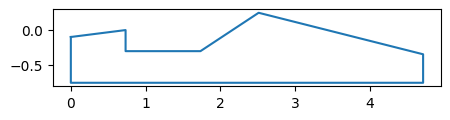

In [1]:
from shapely.geometry import Polygon
import trimesh
import numpy as np
import matplotlib.pyplot as plt

l_tot = 47.10
h_tun = 14.66
h_cha = 3.048
l_cha = 10.01
l_slp = 17.79 - l_cha
x_cha = l_tot - 17.79 - 21.99

point_list = [ [ 0, -1 ], ]
point_list.append( [ x_cha,  -0 ]  )
point_list.append( [ x_cha, -h_cha ] )
point_list.append( [ x_cha + l_cha, -h_cha  ] )
point_list.append( [ x_cha + l_cha + l_slp, 2.5 ])
h_sol = -2.5 * h_cha
point_list += [ [ l_tot, -3.5 ], \
                [ l_tot, h_sol ], [ 0, h_sol ] ]
point_list  = np.array( point_list ) * 0.1  # from mm to cm

poly = Polygon( point_list )

plt.figure( figsize = ( 5, 1 ) )
plt.plot( * poly.exterior.xy )
# plt.ylim( -0.5, 1 )
plt.show()

In [2]:
mesh = trimesh.creation.extrude_polygon( poly, 1.0 )

In [3]:
from flood_sdf import close_mesh_sdf

In [4]:
r0 = np.array([-0.5, -1.5, -0.5])
step = np.array([0.05, 0.05, 0.05])
size = (120, 60, 40)
xs, ys, zs = [np.arange(r0[i], r0[i] + step[i] * size[i], step[i]) for i in range(3)]
X, Y = np.meshgrid(xs, ys)

In [5]:
sdf, sdf_vec = close_mesh_sdf(mesh, r0, step, size, 4)

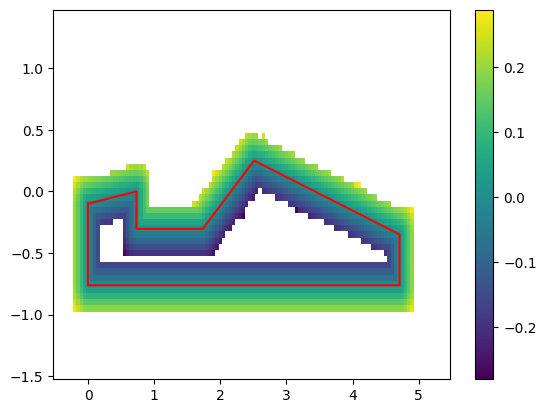

In [6]:
pcm = plt.pcolormesh(X, Y, sdf[:, :, 20].T)
plt.plot(* poly.exterior.xy, color='r')
plt.colorbar(pcm)

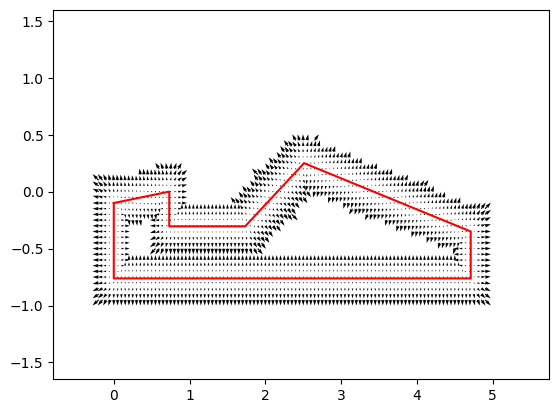

In [7]:
plt.quiver(X, Y, sdf_vec[:, :, 20, 0].T, sdf_vec[:, :, 20, 1].T)
plt.plot(* poly.exterior.xy, color='r')